In [91]:
# Define colors
Pitt.Blue<- "#003594"
Pitt.Gold<-"#FFB81C"
Pitt.DGray <- "#75787B"
Pitt.Gray <- "#97999B"
Pitt.LGray <- "#C8C9C7"
# ggplot preferences
library("ggplot2")
library("repr")
options(repr.plot.width=10, repr.plot.height=10/1.68)
Pitt.Theme<-theme( panel.background = element_rect(fill = "white", size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour =Pitt.Gray), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white")
  )
base<- ggplot() +aes()+ Pitt.Theme

Warning message in readChar(con, 5L, useBytes = TRUE):
"cannot open compressed file 'q4.rdata', probable reason 'No such file or directory'"


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [106]:
Ndata <- 2000
educ <- ifelse(runif(Ndata)<0.6,"hs", ifelse(runif(Ndata)<0.8,"college","grad.degree") ) 
x2.0 <- rnorm(Ndata,mean=2.4,sd=0.4)
x2.1 <- rnorm(Ndata,mean=2.8,sd=0.5)
x2.2 <- rnorm(Ndata,mean=3.2,sd=0.6)
linc <- ifelse(educ=="grad.degree",x2.2,ifelse(educ=="college",x2.1,x2.0) )
age <- round(18+9*rchisq(100,df=5)/4)
ageDM.45 <- (age<=45)*(45-age)+2*(age>55)*(age-55)
hhsize.0 <- 1+rpois(Ndata,lambda=0.8)
hhsize.1 <- 1+rpois(Ndata,lambda=1.5)
hhsize <- ifelse(age<=30 | age>=65,hhsize.0, hhsize.1 )
beta  <- c( 1/2 ,  2, 3 , 3/4  , 1.5 ,-1/3)/3
# make the true linear predictor
eta <- beta[1]+beta[2]*(educ=="college")+beta[3]*(educ=='grad.degree') +beta[4]*linc+ beta[5]*sqrt(hhsize-1)*(hhsize>2)+beta[6]*ageDM.45
# Make the probability
p.mean <- exp(eta)/(1+exp(eta))
# Draw a Bernoulli from the releveant distribution
generateY.binary <- function(p.i) ifelse(p.i>=runif(1),TRUE,FALSE)
binary.outcome <- sapply(p.mean,generateY.binary)
mean(binary.outcome)
datax <- data.frame(Owns.Term.Life=binary.outcome,income=round(exp(8+linc),-2),age=age,education=as.factor(educ), hhsize=hhsize,eta=eta )
head(datax)

[1] 0.3855

,Owns.Term.Life,income,age,education,hhsize,eta
,<lgl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,FALSE,24000,35,hs,1,-0.42306300
2,FALSE,28200,36,hs,1,-0.27136916
3,FALSE,25600,27,hs,3,-0.58827255
4,TRUE,23300,30,hs,3,-0.27913210
5,FALSE,29800,58,hs,2,0.07518454
6,TRUE,18300,37,hs,1,-0.26893869


In [119]:
exp(-0.8028206)

[1] 0.4480634

In [120]:
logit.est <- glm(Owns.Term.Life ~education + hhsize+log(income)+age +I(age**2), data=datax,family = "binomial")
beta.logit <- coef(logit.est)
summary(logit.est)

probit.est <- glm(Owns.Term.Life ~education + hhsize+log(income)+age +I(age**2), data=datax,family = "binomial"(link="probit"))
beta.probit <- coef(probit.est)
summary(probit.est)


Call:
glm(formula = Owns.Term.Life ~ education + hhsize + log(income) + 
    age + I(age^2), family = "binomial", data = datax)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1929  -0.8936  -0.5678   1.0049   2.3443  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.4384931  1.3630985  -6.191 5.99e-10 ***
educationgrad.degree  0.4572038  0.1936643   2.361   0.0182 *  
educationhs          -0.8028206  0.1170052  -6.861 6.82e-12 ***
hhsize                0.3403118  0.0498976   6.820 9.09e-12 ***
log(income)           0.1535304  0.1122259   1.368   0.1713    
age                   0.3068324  0.0306747  10.003  < 2e-16 ***
I(age^2)             -0.0032029  0.0003984  -8.039 9.02e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2666.8  on 1999  degrees of freedom
Residual deviance: 2292.9  on 1993  degrees of fr


Call:
glm(formula = Owns.Term.Life ~ education + hhsize + log(income) + 
    age + I(age^2), family = binomial(link = "probit"), data = datax)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2235  -0.9022  -0.5649   1.0135   2.4165  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -5.0090037  0.8124800  -6.165 7.04e-10 ***
educationgrad.degree  0.2784594  0.1173701   2.372   0.0177 *  
educationhs          -0.4817190  0.0701177  -6.870 6.41e-12 ***
hhsize                0.2037471  0.0295441   6.896 5.33e-12 ***
log(income)           0.0873235  0.0673207   1.297   0.1946    
age                   0.1837458  0.0182525  10.067  < 2e-16 ***
I(age^2)             -0.0019145  0.0002394  -7.996 1.29e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2666.8  on 1999  degrees of freedom
Residual deviance: 2293.9  on 1993

In [114]:
prob.age <- function (age){
    eta=beta.logit["(Intercept)"]+beta.logit["hhsize"]*4+beta.logit["log(income)"]*log(110000)+beta.logit["age"]*age+beta.logit["I(age^2)"]*age**2
    exp(eta)/(1+exp(eta))
}
prob.age.2 <- function (age){
    eta=beta.logit["(Intercept)"]+beta.logit["educationhs"]+beta.logit["hhsize"]*4+beta.logit["log(income)"]*log(60000)+beta.logit["age"]*age+beta.logit["I(age^2)"]*age**2
    exp(eta)/(1+exp(eta))
}

In [115]:
prob.age(40)

(Intercept) 
  0.8645445

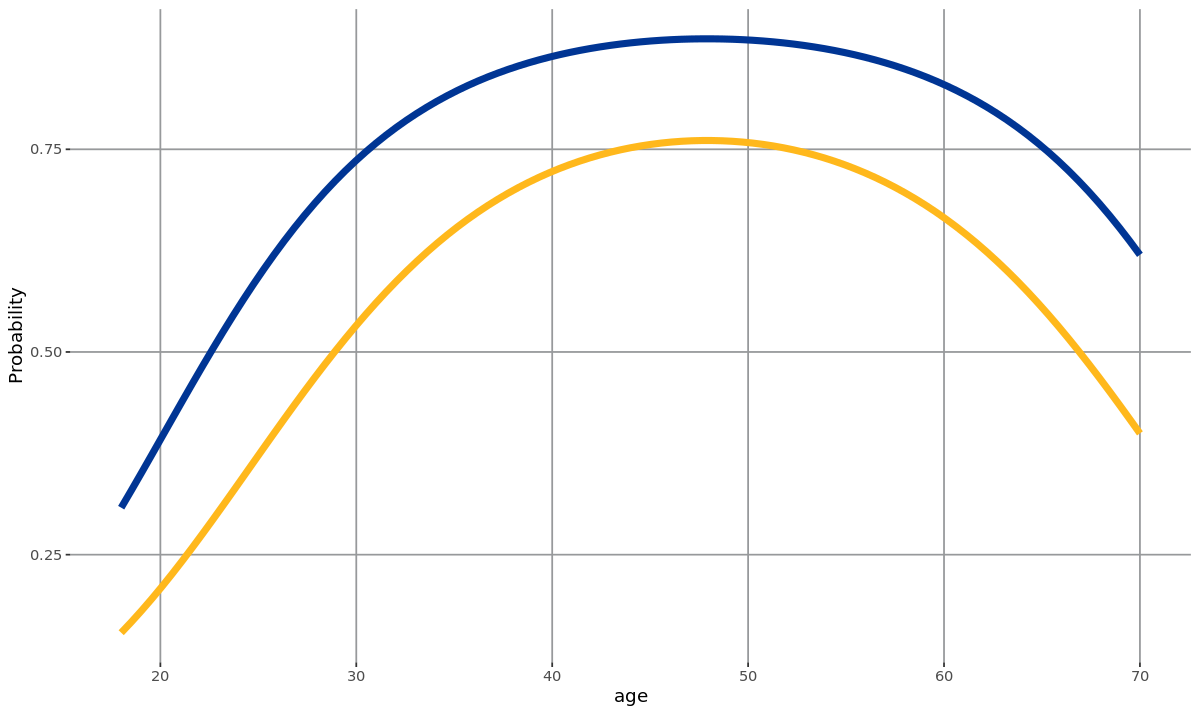

In [117]:
base+ geom_function( fun = prob.age,  size=2,color=Pitt.Blue) + geom_function( fun = prob.age.2,  size=2,color=Pitt.Gold)+
xlim(18, 70)+ylab("Probability")+xlab("age")

In [121]:
library(margins)
summary( margins( logit.est, type='response' ) )

,factor,AME,SE,z,p,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,age,2.200611e-02,1.335417e-03,16.478823,5.208923e-61,1.938874e-02,2.462348e-02
2,educationgrad.degree,9.730953e-02,4.083637e-02,2.382914,1.717623e-02,1.727172e-02,1.773473e-01
3,educationhs,-1.617244e-01,2.353543e-02,-6.871528,6.351778e-12,-2.078529e-01,-1.155958e-01
4,hhsize,6.630726e-02,9.313540e-03,7.119448,1.083601e-12,4.805306e-02,8.456146e-02
5,income,8.273767e-07,6.015695e-07,1.375363,1.690188e-01,-3.516779e-07,2.006431e-06


In [130]:
Quiz4Data <- datax[,c('Owns.Term.Life','income','age','education','hhsize')]

Survey Response: 1,2,3,4,5

Let's make this survey-response a function of:
* Customer Type : Consumer or Corporate
* Agent.ID : 
* Length.call in minutes

In [46]:
Ndata <- 6000
agent.x <- 2*runif(12)-1
agent.id <- round( 11*runif(Ndata)) + 1
call.unif <- runif(Ndata)
type <-  ifelse(agent.id==4 | agent.id==9 | agent.id==10,
                       ifelse(call.unif<0.33,"non.corporate","corporate"),
                    ifelse(call.unif<0.75, "non.corporate","corporate") )
                       
# Make agents 4, 9  and 10 face longer calls
call.duration.0 <- round(2*rchisq(Ndata,df=2) )+1
call.duration.1 <- round( rchisq(Ndata,df=8)+3*rchisq(Ndata,df=1) )+1
call.duration <- ifelse(agent.id==4 | agent.id==9 | agent.id==10, call.duration.1,call.duration.0)
eps <- rnorm(Ndata,mean=0,sd=2)
y.var <- 3  - 2 *log(call.duration)-0.5*(type=="corporate")+agent.x[agent.id]+eps
mean(y.var)
sd(y.var)

[1] -0.5625976

[1] 2.652741

In [66]:
library(memisc)
rating <- factor(cases(
    "Very Bad"=y.var<=-2,
    "Bad"=y.var<=-1.5,
    "Neutral"=y.var<=-0.5,
    "Good"=y.var<=1.5,"Very Good"=TRUE))
rating.val <- ifelse(rating=="Very Bad",1,
                    ifelse(rating=="Bad",2,
                          ifelse(rating=="Neutral",3,
                                 ifelse(rating=="Good",4,5))))
rating.data <- data.frame(rating,rating.val, type,agent.id,call.duration)
head(rating.data)

Warning message in cases(`Very Bad` = y.var <= -2, Bad = y.var <= -1.5, Neutral = y.var <= :
"conditions are not mutually exclusive"


,rating,rating.val,type,agent.id,call.duration
,<fct>,<dbl>,<chr>,<dbl>,<dbl>
1,Bad,2,corporate,4,18
2,Very Bad,1,corporate,4,17
3,Good,4,non.corporate,6,4
4,Very Good,5,non.corporate,11,4
5,Very Bad,1,corporate,9,23
6,Very Bad,1,corporate,12,5


In [71]:
agent.outcomes <- matrix(0, nrow=12, ncol=10)
for (i in 1:12){
    df <- subset(rating.data,agent.id==i )
    agent.outcomes[i , ] <- c(i, mean(df$rating.val),
                          median(df$rating.val),
                         mean(df$rating.val==1),
                         mean(df$rating.val==2),
                         mean(df$rating.val==3),
                         mean(df$rating.val==4),
                         mean(df$rating.val==5),
                         mean(df$type=="corporate"),
                         mean(df$call.duration)
                        )
}
colnames(agent.outcomes) <- c("Agent","Mean.rating","Median.rating","Frac.1","Frac.2","Frac.3","Frac.4","Frac.5","Frac.Corp","Mean.duration")
data.frame(agent.outcomes)

Agent,Mean.rating,Median.rating,Frac.1,Frac.2,Frac.3,Frac.4,Frac.5,Frac.Corp,Mean.duration
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.611511,4.0,0.1582734,0.05395683,0.1187050,0.3561151,0.31294964,0.2769784,5.143885
2,3.244248,4.0,0.2371681,0.06194690,0.1522124,0.3168142,0.23185841,0.2637168,5.104425
3,3.509058,4.0,0.1811594,0.07065217,0.1286232,0.2971014,0.32246377,0.2735507,4.836957
4,2.215827,1.0,0.5089928,0.07733813,0.1654676,0.1852518,0.06294964,0.6888489,12.267986
5,3.192381,4.0,0.2476190,0.06666667,0.1619048,0.2933333,0.23047619,0.2247619,4.902857
6,2.936207,3.0,0.3120690,0.07068966,0.1586207,0.2862069,0.17241379,0.2517241,5.039655
7,3.910448,4.0,0.1044776,0.04850746,0.1250000,0.2761194,0.44589552,0.2238806,5.057836
8,3.009434,3.0,0.2962264,0.06226415,0.1566038,0.3056604,0.17924528,0.2056604,5.067925
9,2.324627,2.0,0.4776119,0.08208955,0.1567164,0.2052239,0.07835821,0.6250000,11.729478


In [97]:
library(MASS)
ologit.est <- polr(as.factor(rating.val)~log(call.duration)+as.factor(agent.id)+as.factor(type),data=rating.data)
oprobit.est <- polr(as.factor(rating.val)~log(call.duration)+as.factor(agent.id)+as.factor(type),data=rating.data,method="probit")
summary(ologit.est)
summary(oprobit.est)


Re-fitting to get Hessian




Call:
polr(formula = as.factor(rating.val) ~ log(call.duration) + as.factor(agent.id) + 
    as.factor(type), data = rating.data)

Coefficients:
                               Value Std. Error  t value
log(call.duration)           -1.6702    0.04146 -40.2810
as.factor(agent.id)2         -0.6306    0.13737  -4.5909
as.factor(agent.id)3         -0.1891    0.13821  -1.3681
as.factor(agent.id)4         -0.1860    0.14561  -1.2772
as.factor(agent.id)5         -0.7346    0.13923  -5.2762
as.factor(agent.id)6         -1.1120    0.13741  -8.0922
as.factor(agent.id)7          0.4944    0.14098   3.5067
as.factor(agent.id)8         -1.0452    0.13978  -7.4776
as.factor(agent.id)9         -0.0913    0.14464  -0.6312
as.factor(agent.id)10        -0.3464    0.14576  -2.3766
as.factor(agent.id)11        -0.6904    0.14019  -4.9245
as.factor(agent.id)12         0.1719    0.16286   1.0556
as.factor(type)non.corporate  0.4246    0.05585   7.6031

Intercepts:
    Value    Std. Error t value 
1|2  -4.039


Re-fitting to get Hessian




Call:
polr(formula = as.factor(rating.val) ~ log(call.duration) + as.factor(agent.id) + 
    as.factor(type), data = rating.data, method = "probit")

Coefficients:
                                Value Std. Error  t value
log(call.duration)           -0.99077    0.02332 -42.4769
as.factor(agent.id)2         -0.36010    0.08138  -4.4248
as.factor(agent.id)3         -0.11352    0.08186  -1.3869
as.factor(agent.id)4         -0.10341    0.08592  -1.2035
as.factor(agent.id)5         -0.44014    0.08243  -5.3393
as.factor(agent.id)6         -0.65118    0.08133  -8.0066
as.factor(agent.id)7          0.30375    0.08317   3.6521
as.factor(agent.id)8         -0.62582    0.08249  -7.5864
as.factor(agent.id)9         -0.06095    0.08562  -0.7119
as.factor(agent.id)10        -0.19924    0.08613  -2.3131
as.factor(agent.id)11        -0.40464    0.08265  -4.8956
as.factor(agent.id)12         0.08398    0.09570   0.8776
as.factor(type)non.corporate  0.25234    0.03293   7.6623

Intercepts:
    Value  

In [98]:
pred.data <- subset(rating.data,agent.id==4 | agent.id==9 | agent.id==10)
pred.data['agent.id']<-7
p7 <- predict(oprobit.est,newdata = pred.data,type="probs")
mean(p7 %*% c(1,2,3,4,5) )

[1] 2.72895

In [100]:
val <- -2.1498 - (0.30375-0.99077*log(5)+0.25234)
pnorm(val)

[1] 0.1332181

In [ ]:
room.type <- ifelse(runif(Ndata)<0.75,"non.corporate","corporate")
educ <- ifelse(runif(Ndata)<0.6,"hs", ifelse(runif(Ndata)<0.8,"college","grad.degree") ) 
x2.0 <- rnorm(Ndata,mean=2.4,sd=0.4)
x2.1 <- rnorm(Ndata,mean=2.8,sd=0.5)
x2.2 <- rnorm(Ndata,mean=3.2,sd=0.6)
linc <- ifelse(educ=="grad.degree",x2.2,ifelse(educ=="college",x2.1,x2.0) )
age <- round(18+9*rchisq(100,df=5)/4)
ageDM.45 <- (age<=45)*(45-age)+2*(age>55)*(age-55)
hhsize.0 <- 1+rpois(Ndata,lambda=0.8)
hhsize.1 <- 1+rpois(Ndata,lambda=1.5)
hhsize <- ifelse(age<=30 | age>=65,hhsize.0, hhsize.1 )
beta  <- c( 1/2 ,  2, 3 , 3/4  , 1.5 ,-1/3)/3
# make the true linear predictor
eta <- beta[1]+beta[2]*(educ=="college")+beta[3]*(educ=='grad.degree') +beta[4]*linc+ beta[5]*sqrt(hhsize-1)*(hhsize>2)+beta[6]*ageDM.45
# Make the probability
p.mean <- exp(eta)/(1+exp(eta))
# Draw a Bernoulli from the releveant distribution
generateY.binary <- function(p.i) ifelse(p.i>=runif(1),TRUE,FALSE)
binary.outcome <- sapply(p.mean,generateY.binary)
mean(binary.outcome)
datax <- data.frame(Owns.Term.Life=binary.outcome,income=round(exp(8+linc),-2),age=age,education=as.factor(educ), hhsize=hhsize,eta=eta )
head(datax)

In [102]:
save(rating.data,file='ratings.rdata')

In [103]:
rating.data

rating,rating.val,type,agent.id,call.duration
<fct>,<dbl>,<chr>,<dbl>,<dbl>
Bad,2,corporate,4,18
Very Bad,1,corporate,4,17
Good,4,non.corporate,6,4
Very Good,5,non.corporate,11,4
Very Bad,1,corporate,9,23
Very Bad,1,corporate,12,5
Very Bad,1,non.corporate,11,9
Neutral,3,non.corporate,8,1
Good,4,non.corporate,11,4
